<a href="https://colab.research.google.com/github/marziyeh-sa/Machine_Learning_Fall2020/blob/main/Hands_On/HO7_SVM_ML2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Functions:

![image-7.png](attachment:image-7.png)

# Support vector machines:

![image-4.png](attachment:image-4.png)

# Kernel method in SVM:

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image-7.png](attachment:image-7.png)
![image-9.png](attachment:image-9.png)
![image-2.png](attachment:image-2.png)
![image-8.png](attachment:image-8.png)

### SVC:
![image.png](attachment:image.png)

for further information check: https://scikit-learn.org/stable/modules/svm.html#id14

In [ ]:
# creating data set
import numpy as np

np.random.seed(4)
# class 1
X1_1 = np.random.normal(2, 0.4, 200)
X2_1 = np.random.normal(0.5, 0.4, 200)
X_1 = np.vstack((X1_1, X2_1))

# class 2
X1_2 = np.random.normal(2.5, 1, 700)
X2_2 = np.random.normal(2.5, 0.2, 700)
X_2 = np.vstack((X1_2, X2_2))

# class 3
X1_31 = np.random.normal(1, 0.4, 150)
X2_31 = np.random.normal(4, 0.7, 150)
X1_32 = np.random.normal(5, 0.4, 50)
X2_32 = np.random.normal(1.5, 0.7, 50)
# X_3 = np.vstack((X1_3, X2_3))
X_31 = np.vstack((X1_31, X2_31))
X_32 = np.vstack((X1_32, X2_32))

x_data = np.hstack((X_1,X_2,X_31,X_32)).T
y_data = [1]*(X_1).shape[1] + [2]*(X_2).shape[1] + [3]*(X_31.shape[1]+X_32.shape[1])

In [ ]:
x_data.shape,len(y_data)

((1100, 2), 1100)

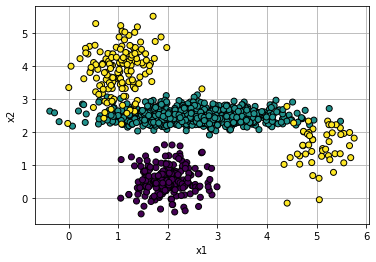

In [ ]:
# visualizing the dataset
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_data[:,0],x_data[:,1], c = y_data, zorder=20,
                edgecolors='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [ ]:
# split the dataset into train and test for cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=40)

In [ ]:
# normalize the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
# sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
# shuffle the dataset
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state = 2)
x_test, y_test = shuffle(x_test, y_test, random_state = 2)

In [ ]:
# check wether the dataset is balanced or not
np.unique(y_train, return_counts = True)

(array([1, 2, 3]), array([150, 523, 152], dtype=int64))

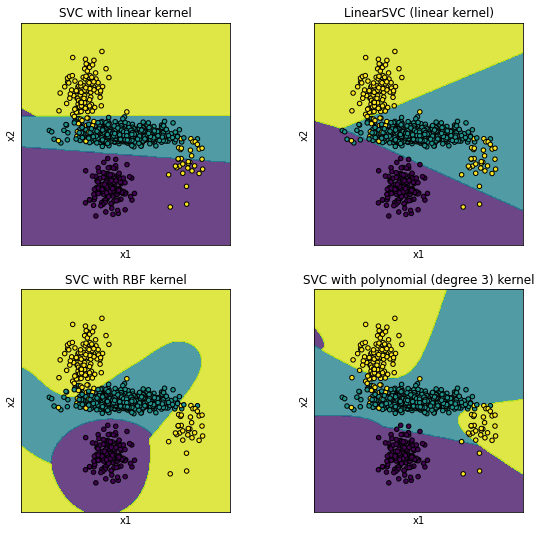

Accuracy of svm with linear kernel: 0.9272727272727272
Accuracy of svm with LinearSVC (linear kernel): 0.92
Accuracy of svm with RBF kernel: 0.9781818181818182
Accuracy of svm with polynomial (degree 3) kernel: 0.9527272727272728


In [ ]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = x_train
y = y_train

# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear',class_weight=class_weight),
          svm.LinearSVC(class_weight=class_weight),
#           svm.SVC(kernel='sigmoid',class_weight=class_weight),
          svm.SVC(kernel='rbf',class_weight=class_weight),
          svm.SVC(kernel='poly',class_weight=class_weight, degree=3))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
#           'SVC with sigmoid kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2,2,  figsize=(9, 9))
plt.subplots_adjust(wspace=0.4, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

scores = []
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                   alpha=0.8)
    ax.scatter(X0, X1, c=y, s=20, edgecolors='k')
    scores.append(clf.score(x_test,y_test))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

print('Accuracy of svm with linear kernel:',scores[0])
print('Accuracy of svm with LinearSVC (linear kernel):',scores[1])
print('Accuracy of svm with RBF kernel:',scores[2])
print('Accuracy of svm with polynomial (degree 3) kernel:',scores[3])

![image.png](attachment:image.png)
for further information check: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
# tune parameters
from sklearn.model_selection import GridSearchCV

model = svm.SVC(kernel='poly',class_weight=class_weight, decision_function_shape='ovo')
clf_poly = GridSearchCV(model,param_grid={'C':[.5, .7 ,1, 1.5],'degree':[1 ,2, 3 ,4],
                                   'gamma':[1 ,2 ,3 ,4, 5]},return_train_score='False')
clf_poly.fit(x_train,y_train)
print('best parameters of the model are:',clf_poly.best_params_)
print('accuracy of the model is:',clf_poly.score(x_test,y_test))

best parameters of the model are: {'C': 0.5, 'degree': 4, 'gamma': 1}
accuracy of the model is: 0.9781818181818182


![image.png](attachment:image.png)
for further information check: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [ ]:
# use pipeline
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()), ('SVM', svm.SVC(kernel = 'rbf'))]
pipeline = Pipeline(steps) # define the pipeline object.
parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(x_train, y_train)

print ('accuracy of the model is:',grid.score(x_test,y_test))
print ('best parameters of the model are:',grid.best_params_)



accuracy of the model is: 0.9781818181818182
best parameters of the model are: {'SVM__C': 100, 'SVM__gamma': 0.1}


In [ ]:
# model evaluation
from sklearn.metrics import confusion_matrix, classification_report

y_pred = grid.predict(x_test)
confusion_mtx = confusion_matrix(y_test, y_pred)

print('classification report:')
print(classification_report(y_test, y_pred))
print('confusion matrix:')
print(confusion_mtx)

classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       0.97      0.99      0.98       177
           3       0.98      0.90      0.93        48

    accuracy                           0.98       275
   macro avg       0.98      0.96      0.97       275
weighted avg       0.98      0.98      0.98       275

confusion matrix:
[[ 50   0   0]
 [  0 176   1]
 [  0   5  43]]


# Nonlinear and kernel regression:

![image.png](attachment:image.png)

![image.png](attachment:image.png)
for further information check: https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge

![image-5.png](attachment:image-5.png)
![image-6.png](attachment:image-6.png)
![image-3.png](attachment:image-3.png)
for further information check: https://scikit-learn.org/stable/modules/svm.html#id14

### the dataset below contains daily USA gold price which is downloaded from: 
https://www.usagold.com/reference/prices/goldhistory.php

In [ ]:
# preprocessing
# loading dataset
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


data = np.loadtxt('gold_price.txt', dtype=np.float32, delimiter=',')

# making window of size w to predict the next day price after 10 days

w = 10 #window size
row = np.zeros((1,w))
x = np.zeros((1,w))
y = []
for i in range(len(data)-w-1):
    for j in range(i,i+w):
        row[0,i%w] = data[i]
    y.append(data[i+w])
    x = np.vstack((x,row))
y = np.array(y) 
x = x[1:]

In [ ]:
y.shape,x.shape

((1257,), (1257, 10))

In [ ]:
#  train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# data shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1005, 10), (252, 10), (1005,), (252,))

In [ ]:
# using Support vector regression

pipe_svr = Pipeline([('scaler', StandardScaler()), ('SVM', svm.SVR(kernel = 'rbf'))]) 
parameteres_svr = {'SVM__C':[1,10], 'SVM__gamma':[0.1,0.01]
              ,'SVM__epsilon':[0.1,0.01]}
model_SVR = GridSearchCV(pipe_svr, param_grid=parameteres_svr, cv=2)
model_SVR.fit(x_train, y_train)

print ('R squared metric for the model is:',model_SVR.score(x_test,y_test))
print ('best parameters of the model are:',model_SVR.best_params_)

R squared metric for the model is: 0.7136088338625899
best parameters of the model are: {'SVM__C': 10, 'SVM__epsilon': 0.01, 'SVM__gamma': 0.1}


In [ ]:
# using kernel ridg regression
from sklearn.kernel_ridge import KernelRidge

pipe_krr = Pipeline([('scaler', StandardScaler()), ('krr', KernelRidge(kernel = 'rbf'))]) 
parameteres_krr = {'krr__alpha':[0.1,0.01,1,0.001,10e-5,10e-10], 'krr__gamma':[100,10,0.1,0.01,0.001]}
model_KRR = GridSearchCV(pipe_krr, param_grid=parameteres_krr, cv=2)
model_KRR.fit(x_train, y_train)

print ('R squared metric for the model is:',model_KRR.score(x_test,y_test))
print ('best parameters of the model are:',model_KRR.best_params_)

R squared metric for the model is: 0.6997044548907684
best parameters of the model are: {'krr__alpha': 0.01, 'krr__gamma': 0.001}


In [ ]:
# predict the price 
y_pred_SVR = model_SVR.predict(x_test)
y_pred_KRR = model_KRR.predict(x_test)

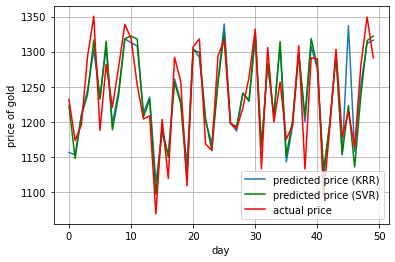

In [ ]:
# plotting the predicted and actual price
import matplotlib.pyplot as plt
l = 50
plt.plot(np.arange(l),y_pred_KRR[:l], label = 'predicted price (KRR)')
plt.plot(np.arange(l),y_pred_SVR[:l],color='g', label = 'predicted price (SVR)')
plt.plot(np.arange(l),y_test[:l],color='r', label = 'actual price')
plt.xlabel('day')
plt.ylabel('price of gold')
plt.legend()
plt.grid()
plt.show()

![image.png](attachment:image.png)
for further information chesk: 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn import svm

pipe_kpca = Pipeline([('scaler', StandardScaler()), ('kPCA', KernelPCA(kernel ='poly')), 
                    ('SVM', svm.SVR(kernel = 'rbf', C = 10, epsilon= 0.01, gamma = 0.1 ) )])
parameter_kpca = {'kPCA__n_components': [1,5,10]}
model_kpca = GridSearchCV(pipe_kpca, param_grid=parameter_kpca, cv=2)
model_kpca.fit(x_train, y_train)

print ('R squared metric for the model is:',model_kpca.score(x_test,y_test))
print ('best parameters of the model are:',model_kpca.best_params_)


R squared metric for the model is: 0.7185742905730628
best parameters of the model are: {'kPCA__n_components': 10}
